In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t

import statistics
import math


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/image/IRL_protest_result_imagenoise_pedestrian.json', lines=True)
info_car2PPO_episode_1.columns = info_car2PPO_episode_1.columns.str.replace('noise', 'image noise')


In [3]:
info_car2PPO_episode_1['reward']

0       -2.972482
1       -3.723040
2       -4.609869
3       -3.919486
4       -1.811082
           ...   
29995    2.669392
29996    2.833346
29997    3.147607
29998    2.686280
29999    3.141371
Name: reward, Length: 30000, dtype: float64

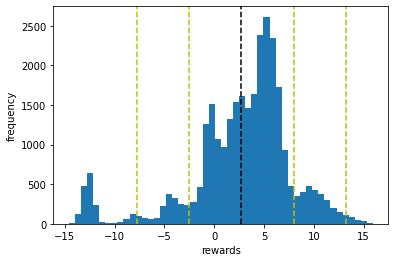

In [4]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

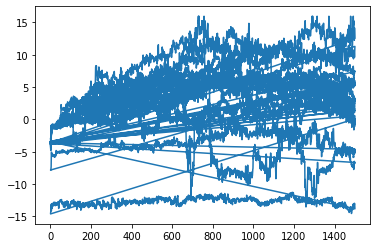

In [5]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [6]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

2.7300073814183334

In [6]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.030307603116175356

In [7]:
confLevel = 0.95

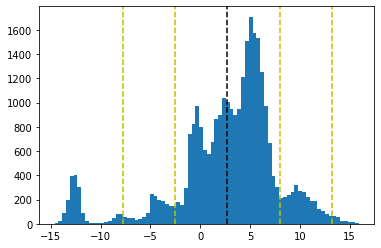

In [8]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [9]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  2.7300073814183334
Std Deviation :  5.249430845284855
1st Std Interval :  -2.5194234638665214 7.979438226703188
2nd Std Interval :  -7.768854309151376 13.228869071988044
Confidence Interval :  0.1630488208237175
Confidence Interval :  2.566958560594616 2.8930562022420507


In [15]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

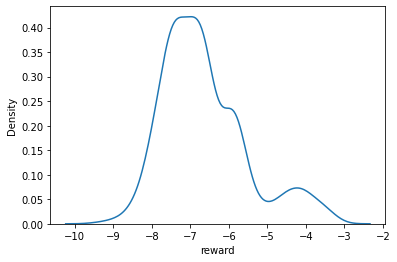

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

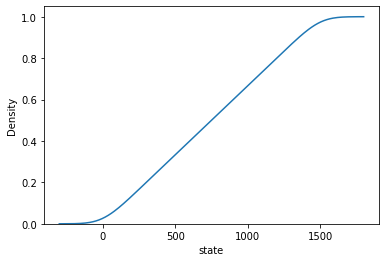

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

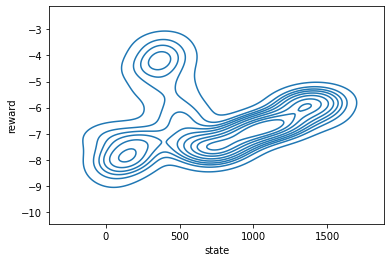

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

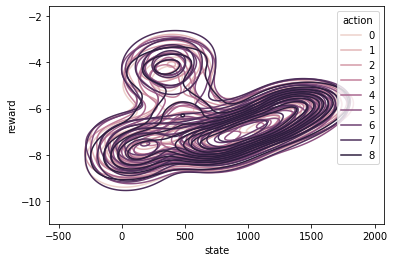

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


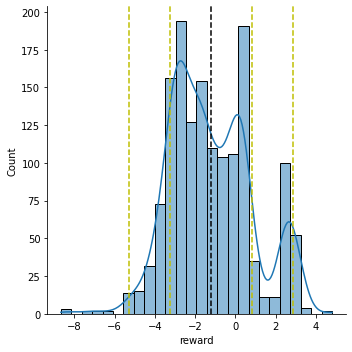

In [19]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

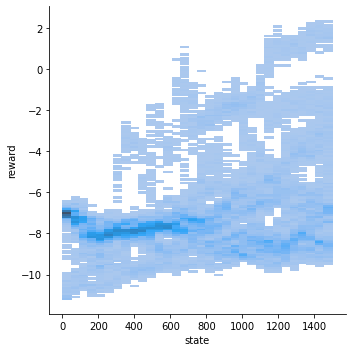

In [11]:
sns.displot(data=info_car2PPO_episode_1, x="state", y="reward")


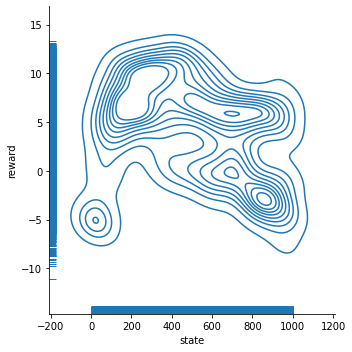

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


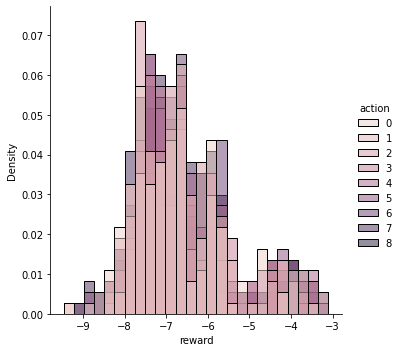

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


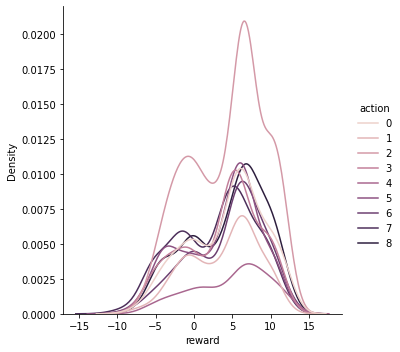

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


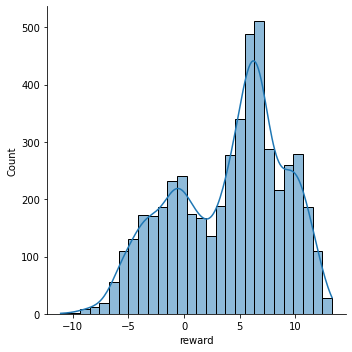

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


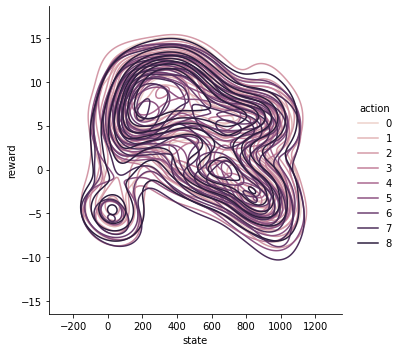

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


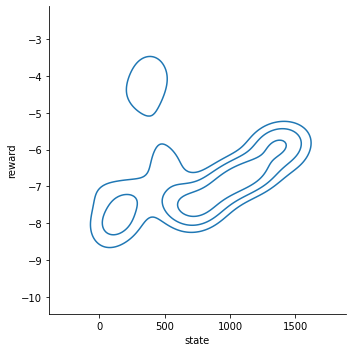

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


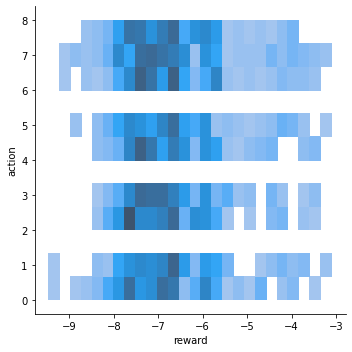

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


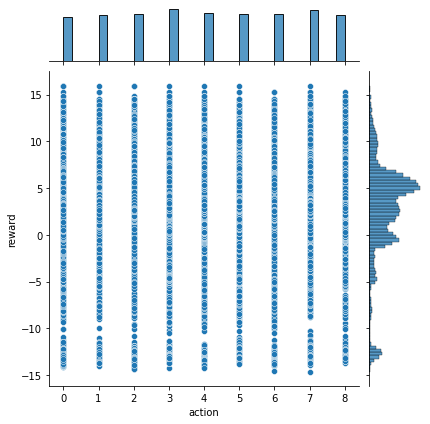

In [10]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


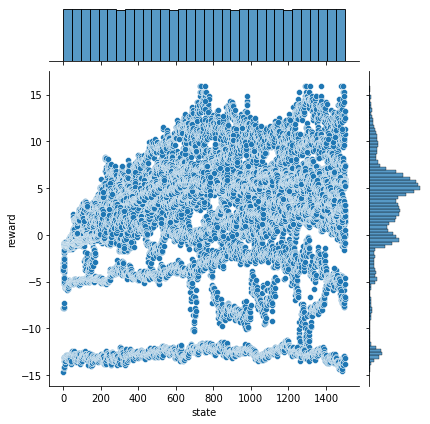

In [11]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


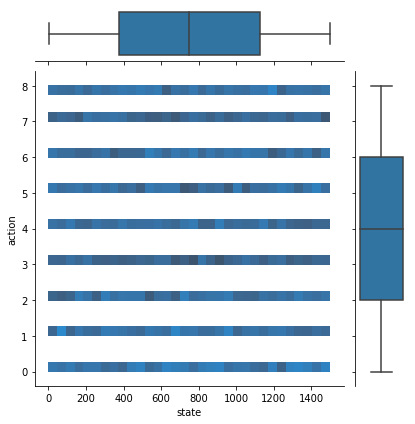

In [12]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

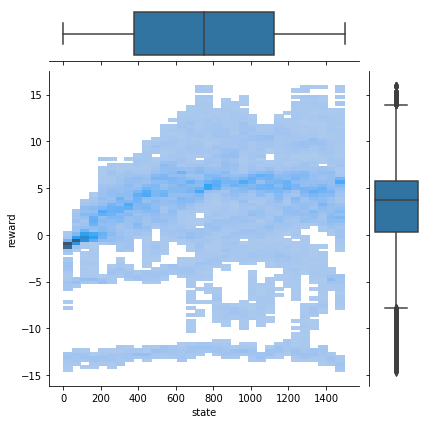

In [13]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

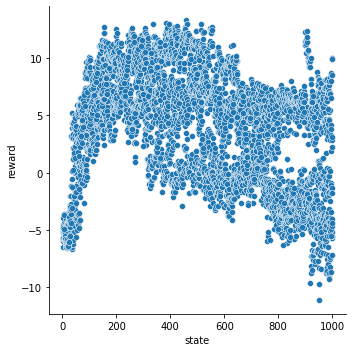

In [31]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

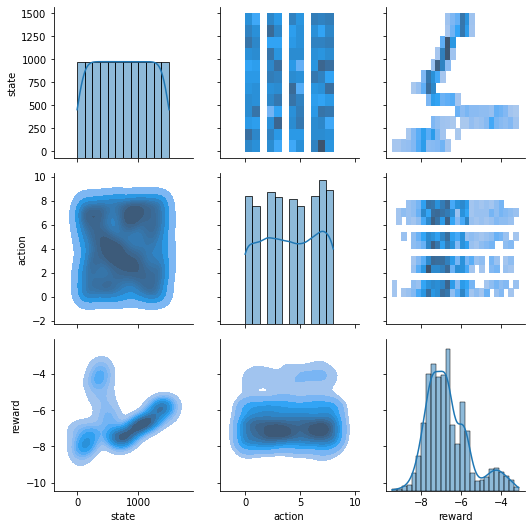

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

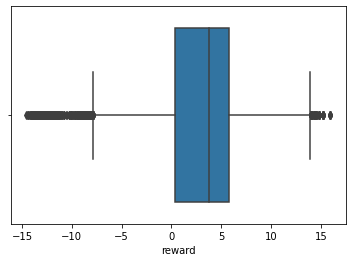

In [14]:
sns.boxplot(info_car2PPO_episode_1['reward'])


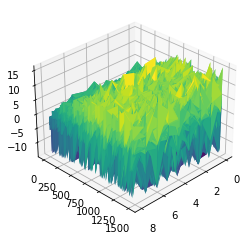

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [3]:
# Episode 1

info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/image/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_pedestrian1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/image/info_pedestrian1.json', lines=True)
info_pedestrian1 = pd.concat([info_pedestrian1.drop(['control'], axis=1), info_pedestrian1['control'].apply(pd.Series)], axis=1)


In [21]:
info_car2.shape

(30000, 35)

In [7]:
print((info_car2['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car2['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car2['collision_pedestrians']!= 0).values.sum()/30000, "collision_pedestrian")
print((info_car2['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car2['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0 collision_vehicles
0.006033333333333333 collision_other
0.0829 collision_pedestrian
0.24146666666666666 intersection_offroad
0.24146666666666666 intersection_otherlane


In [10]:
SE_CO = sem(info_car2['collision_other'] != 0)
print (SE_CO)
SE_CP = sem(info_car2['collision_pedestrians'] != 0)
print (SE_CP)
SE_OS = sem(info_car2['intersection_otherlane'] != 0)
print (SE_OS)


0.00044710670339515317
0.0015919602626686168
0.002470941933147442


In [15]:
print (info_car2['collision_vehicles'].idxmax())
print (info_car2['collision_other'].idxmax())
print (info_car2['collision_pedestrians'].idxmax())
print (info_car2['intersection_offroad'].idxmax())

0
1319
4236
1315


In [11]:
print (info_car2['collision_vehicles'].idxmax()*0.134)
print (info_car2['collision_other'].idxmax()*0.134)
print (info_car2['collision_pedestrians'].idxmax()*0.134)
print (info_car2['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

0.0
176.746
567.624
176.21


In [16]:
mean_collision_other = []
for chunk in np.array_split(info_car2['collision_other'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_other.append((res))
    print (x, " : ", res)
mean_collision_other = statistics.mean(mean_collision_other)
mean_collision_other

1319  :  1320
1500  :  1
3000  :  1
4500  :  1
6000  :  1
7500  :  1
9000  :  1
10500  :  1
12000  :  1
13500  :  1
15000  :  1
16500  :  1
18000  :  1
19500  :  1
21000  :  1
22500  :  1
24000  :  1
25500  :  1
27000  :  1
28500  :  1


66.95

In [17]:
mean_collision_pedestrians = []
for chunk in np.array_split(info_car2['collision_pedestrians'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_pedestrians.append((res))
    print (x, " : ", res)
mean_collision_pedestrians = statistics.mean(mean_collision_pedestrians)
mean_collision_pedestrians


0  :  1
1500  :  1
4236  :  1237
4500  :  1
7274  :  1275
8628  :  1129
10398  :  1399
10500  :  1
13186  :  1187
14819  :  1320
16226  :  1227
16500  :  1
19433  :  1434
20794  :  1295
22288  :  1289
22500  :  1
24000  :  1
26745  :  1246
28486  :  1487
28500  :  1


776.65

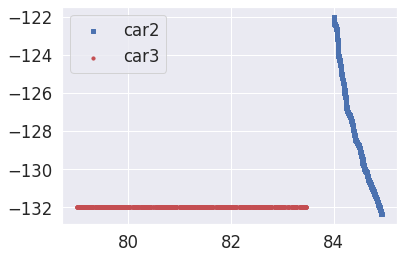

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=10, c='b', marker="s", label='car2')
ax1.scatter(info_pedestrian1['x'][1501:3000],info_pedestrian1['y'][1501:3000], s=10, c='r', marker="o", label='car3')
plt.legend(loc='upper left');
plt.show()

### RQ2

In [4]:
print((info_car2PPO_episode_1['noise']!= 0).values.sum()/30000,"noise")


0.0953 noise


In [5]:
info_car2PPO_episode_1['noise'].value_counts()


0    27141
1     2859
Name: noise, dtype: int64

In [6]:
print (info_car2PPO_episode_1['noise'].idxmax())


3


In [19]:
mean_noise = []
for chunk in np.array_split(info_car2PPO_episode_1['noise'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_noise.append((res))
    print (x, " : ", res)
mean_noise = statistics.mean(mean_noise)
mean_noise

3  :  4
1500  :  1
3003  :  4
4501  :  2
6000  :  1
7500  :  1
9000  :  1
10500  :  1
12000  :  1
13500  :  1
15000  :  1
16500  :  1
18001  :  2
19500  :  1
21000  :  1
22500  :  1
24003  :  4
25500  :  1
27002  :  3
28502  :  3


1.75

### RQ3

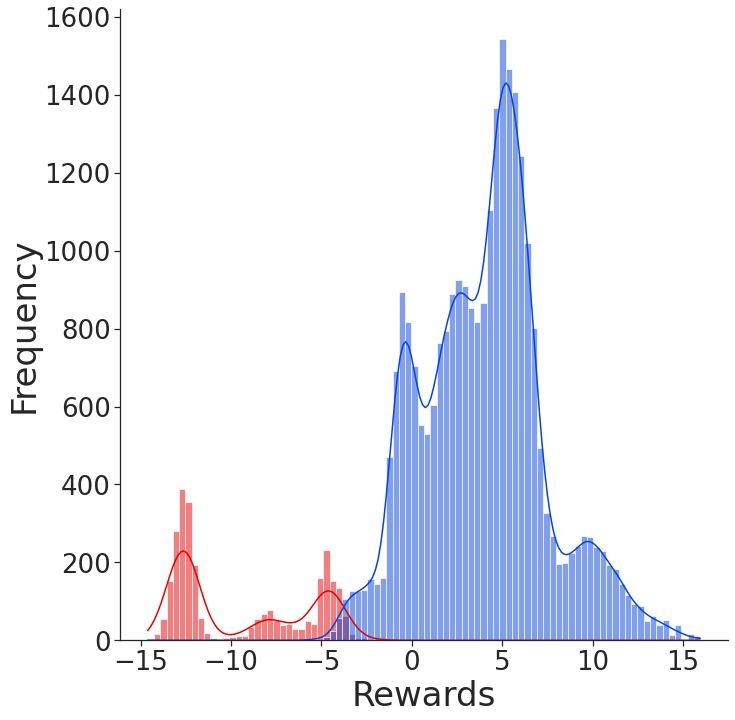

In [5]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
my_palette = sns.color_palette(["#0343DF", "#E50000"])



g = sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="image noise",palette=my_palette,height=10,color=color[0], legend=False)
# plt.axvline(-8, color='y', linestyle='dashed')
# g.fig.set_figwidth(8)
# g.fig.set_figheight(8)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

g.set_axis_labels('Rewards','Frequency',fontsize=34)

plt.savefig("RQ3_pedestrian_14.jpg",bbox_inches = "tight")


In [9]:
df = pd.DataFrame()
df['x'] = info_car2['x']
df['y'] = info_car2['y']
df['noise'] = info_car2PPO_episode_1['noise']

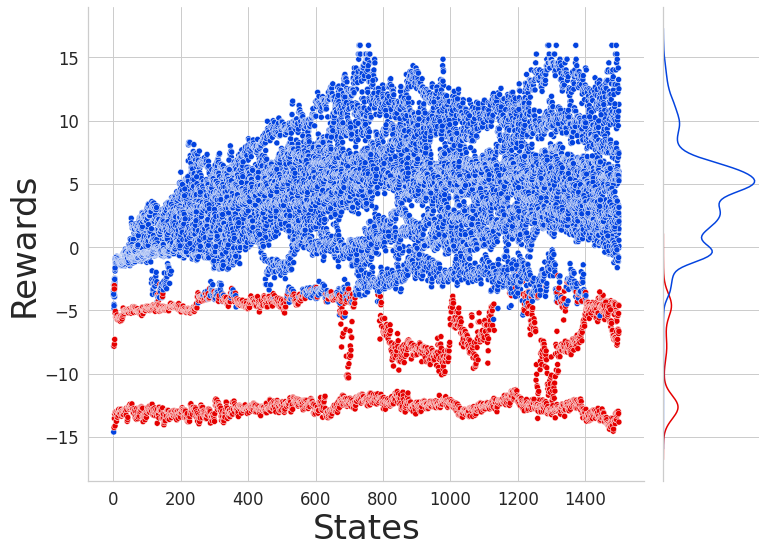

In [4]:
sns.reset_orig()
# sns.color_palette("rocket")
my_palette = sns.color_palette(["#0343DF", "#E50000"])

sns.set(font_scale = 1.5)

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward", hue="image noise",palette=my_palette)
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_marg_x.remove()
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.set_axis_labels('States','Rewards',fontsize=34)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.ax_joint.legend_.remove()
plt.savefig("RQ3_pedestrian_15.jpg",bbox_inches = "tight")


(-0.5, 412.5, 604.5, -0.5)

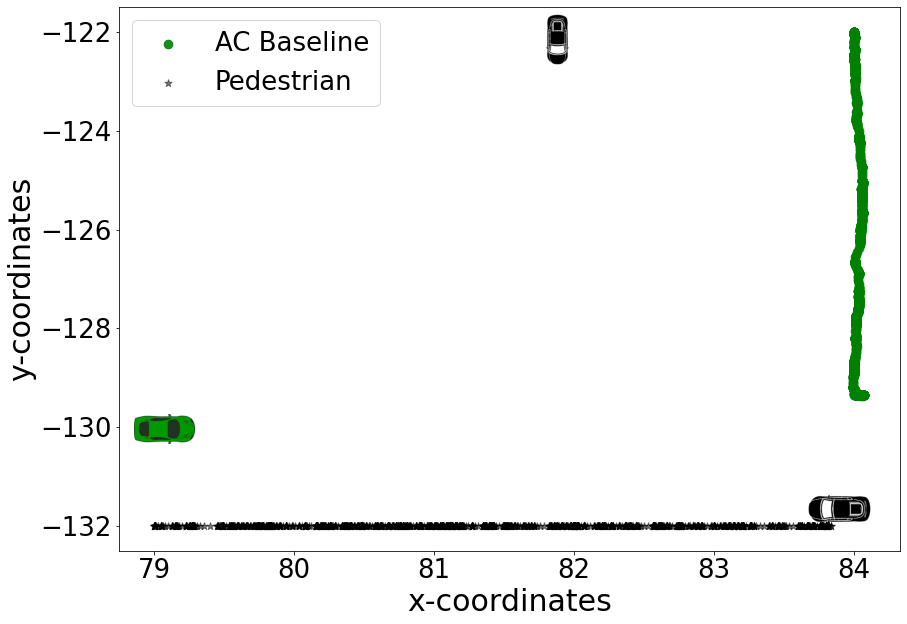

In [5]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(84.3, -131.9, "collision", horizontalalignment='left', size='20', color='red', weight='semibold')

plt.savefig("RQ3_pedestrian_3.pdf")


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


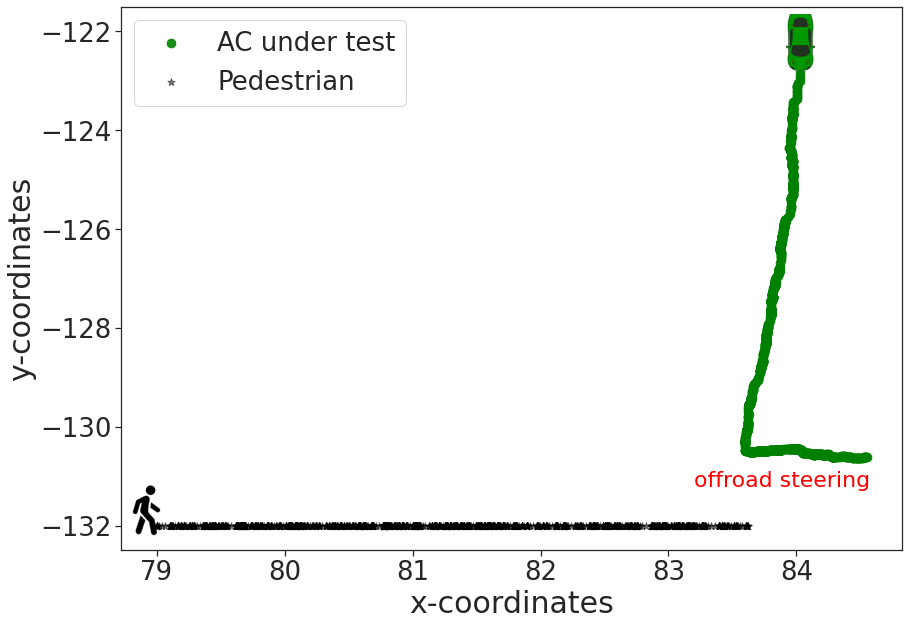

In [6]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][7501:9000], info_car2['y'][7501:9000], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][7501:9000],info_pedestrian1['y'][7501:9000], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][7501:9000], info_car2['y'][7501:9000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][7501:9000],info_pedestrian1['y'][7501:9000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(83.2, -131.2, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.785, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')


plt.savefig("RQ3_pedestrian_4.jpg", bbox_inches = "tight")


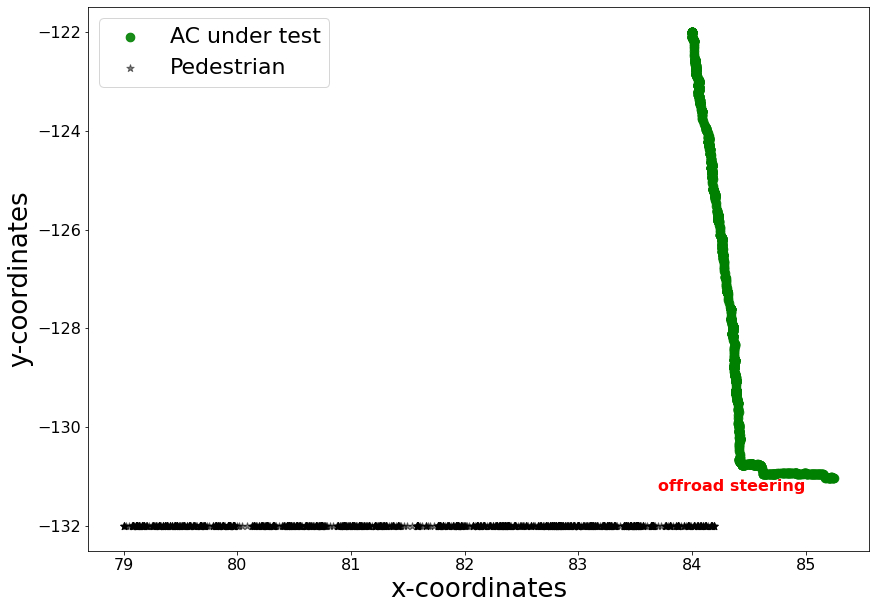

In [13]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][3001:4500],info_pedestrian1['y'][3001:4500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][3001:4500],info_pedestrian1['y'][3001:4500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.text(83.7, -131.3, "offroad steering", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_pedestrian_5.pdf")

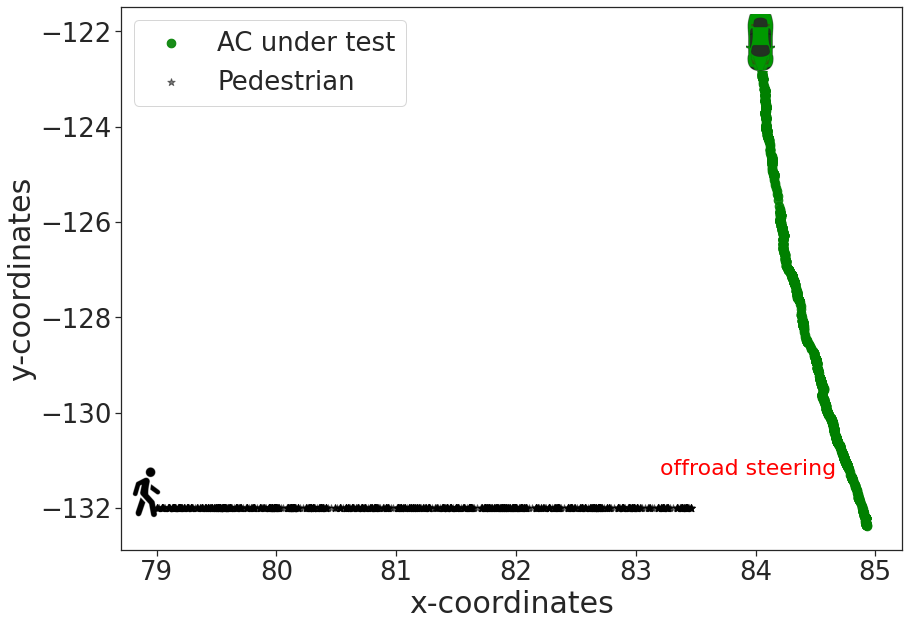

In [7]:
# fig = plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)



# ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=300, c='green', marker=".", label='car2',alpha =0.08,)
# ax1.scatter(info_pedestrian1['x'][1501:3000],info_pedestrian1['y'][1501:3000], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)
# plt.legend(loc='upper right')
# plt.xlabel('x-coordinates', fontsize=22)
# plt.ylabel('y-coordinates', fontsize=22)

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# plt.show()



fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][1501:3000],info_pedestrian1['y'][1501:3000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(83.2, -131.3, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.745, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.166, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

plt.savefig("RQ3_pedestrian_6.jpg", bbox_inches = "tight")

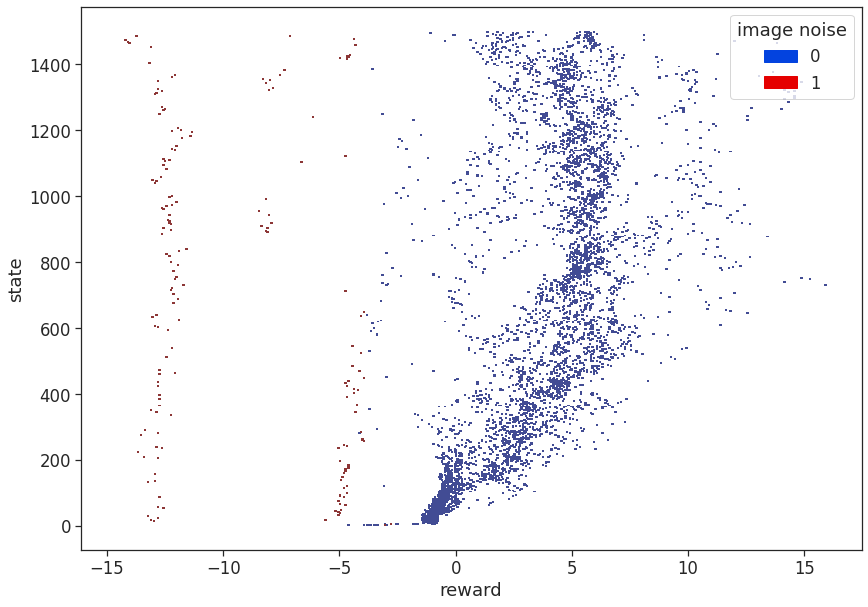

In [20]:
sns.reset_orig()
sns.set(font_scale = 1.5)

fig = plt.figure(figsize=(14,10))
my_palette = sns.color_palette(["#0343DF", "#E50000"])
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="image noise", palette=my_palette,
    bins=500,
    pthresh=.4, pmax=.05, 
)
plt.savefig("RQ3_pedestrian_16.pdf")
